In [1]:
!pip install chardet

In [6]:
!pip install geopandas
!pip install folium

     -------------------------------------- 108.9/108.9 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 90.4/90.4 kB 5.0 MB/s eta 0:00:00
     -------------------------------------- 134.9/134.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.1.6 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [7]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [8]:
import matplotlib.colors as mcolors

In [9]:
import os

In [10]:
import seaborn as sns

In [ ]:
df = pd.read_csv(r'../data/IPRESS.csv', dtype={"UBIGEO": str}, encoding="latin1")
print(df.head())

         Instituci√≥n  C√≥digo √önico Nombre del establecimiento  \
0            PRIVADO         16618                 SONRIE MAS   
1  GOBIERNO REGIONAL          7050                     AMBATO   
2  GOBIERNO REGIONAL            99  SANTA ISABEL DE YUMBATURO   
3            PRIVADO         19555               DENTOCAPLINA   
4               OTRO         18792  MEDICO DE FAMILIA MANTARA   

                                       Clasificaci√≥n  \
0  CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...   
1                 PUESTOS DE SALUD O POSTAS DE SALUD   
2                 PUESTOS DE SALUD O POSTAS DE SALUD   
3  CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...   
4                 PUESTOS DE SALUD O POSTAS DE SALUD   

                                         Tipo Departamento Provincia  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO    CAJAMARCA   CUTERVO   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO       

In [ ]:
df_valid_coords = df.dropna(subset=["NORTE", "ESTE"])

print(df_valid_coords.head())
print("Number of records with valid coordinates:", len(df_valid_coords))

          Instituci√≥n  C√≥digo √önico         Nombre del establecimiento  \
1   GOBIERNO REGIONAL          7050                             AMBATO   
2   GOBIERNO REGIONAL            99          SANTA ISABEL DE YUMBATURO   
6               MINSA          7278  PUESTO DE SALUD HEROES DEL CENEPA   
12  GOBIERNO REGIONAL          5460                      NUEVA BETANIA   
15  GOBIERNO REGIONAL          6431                         PONGO ISLA   

                         Clasificaci√≥n  \
1   PUESTOS DE SALUD O POSTAS DE SALUD   
2   PUESTOS DE SALUD O POSTAS DE SALUD   
6   PUESTOS DE SALUD O POSTAS DE SALUD   
12  PUESTOS DE SALUD O POSTAS DE SALUD   
15  PUESTOS DE SALUD O POSTAS DE SALUD   

                                          Tipo Departamento         Provincia  \
1   ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO    CAJAMARCA           CUTERVO   
2   ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO       LORETO            LORETO   
6   ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         

In [ ]:
print(df["Condici√≥n"].unique())  #We check how "Condici√≥n" is stored and determine that we need "EN FUNCIONAMIENTO".

['EN FUNCIONAMIENTO' 'INOPERATIVO' 'CIERRE TEMPORAL'
 'RESTRICCI√ìN DE SERVICIOS']


In [ ]:
df["Condici√≥n"] = df["Condici√≥n"].str.strip()

df_funcionamiento = df[
    (df["Condici√≥n"] == "EN FUNCIONAMIENTO") &
    (df["NORTE"].notna()) &
    (df["ESTE"].notna())
].copy()

print(df_funcionamiento.shape)
print(df_funcionamiento.head())

(7942, 33)
          Instituci√≥n  C√≥digo √önico         Nombre del establecimiento  \
1   GOBIERNO REGIONAL          7050                             AMBATO   
2   GOBIERNO REGIONAL            99          SANTA ISABEL DE YUMBATURO   
6               MINSA          7278  PUESTO DE SALUD HEROES DEL CENEPA   
12  GOBIERNO REGIONAL          5460                      NUEVA BETANIA   
15  GOBIERNO REGIONAL          6431                         PONGO ISLA   

                         Clasificaci√≥n  \
1   PUESTOS DE SALUD O POSTAS DE SALUD   
2   PUESTOS DE SALUD O POSTAS DE SALUD   
6   PUESTOS DE SALUD O POSTAS DE SALUD   
12  PUESTOS DE SALUD O POSTAS DE SALUD   
15  PUESTOS DE SALUD O POSTAS DE SALUD   

                                          Tipo Departamento         Provincia  \
1   ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO    CAJAMARCA           CUTERVO   
2   ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO       LORETO            LORETO   
6   ESTABLECIMIENTO DE SALUD SIN INTERNAMIEN

Task 1: Static Maps ‚Äî Hospital Count by District

In [ ]:
distritos = gpd.read_file(r'../data/districts/DISTRITOS.shp')  #Import shapefile
print(distritos.head())


  IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503   PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503   PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503   PADRE ABAD  250304                 NESHUYA   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   

                                            geometry  
0  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3  POLYGON ((-75.13864 -8.56

In [ ]:
distritos = distritos.rename({'IDDIST':'UBIGEO'}, axis =1 )  #Rename IDDIST to UBIGEO so it can be merged later

In [ ]:
distritos #We check "distritos"

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  UBIGEO                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  
0     POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...  
...                                                 ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...  
1872  POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...  

[1873 rows x 11 columns]

In [ ]:
df_funcionamiento #We check df_funcionamiento.

Instituci√≥n  C√≥digo √önico  \
1      GOBIERNO REGIONAL          7050   
2      GOBIERNO REGIONAL            99   
6                  MINSA          7278   
12     GOBIERNO REGIONAL          5460   
15     GOBIERNO REGIONAL          6431   
...                  ...           ...   
20814  GOBIERNO REGIONAL          2283   
20815  GOBIERNO REGIONAL          2278   
20816  GOBIERNO REGIONAL          2274   
20817  GOBIERNO REGIONAL          2272   
20818  GOBIERNO REGIONAL           704   

                              Nombre del establecimiento  \
1                                                 AMBATO   
2                              SANTA ISABEL DE YUMBATURO   
6                      PUESTO DE SALUD HEROES DEL CENEPA   
12                                         NUEVA BETANIA   
15                                            PONGO ISLA   
...                                                  ...   
20814                               P.S NUEVO HUALAPAMPA   
20815                          P.S SAN MARTIN DE CONGO√ëA   
20816                                          P.S TUNAS   
20817                               C.S LIMON DE PORCUYA   
20818  HOSPITAL REGIONAL DOCENTE DE ENFERMEDADES NEOP...   

                                         Clasificaci√≥n  \
1                   PUESTOS DE SALUD O POSTAS DE SALUD   
2                   PUESTOS DE SALUD O POSTAS DE SALUD   
6                   PUESTOS DE SALUD O POSTAS DE SALUD   
12                  PUESTOS DE SALUD O POSTAS DE SALUD   
15                  PUESTOS DE SALUD O POSTAS DE SALUD   
...                                                ...   
20814               PUESTOS DE SALUD O POSTAS DE SALUD   
20815               PUESTOS DE SALUD O POSTAS DE SALUD   
20816               PUESTOS DE SALUD O POSTAS DE SALUD   
20817               CENTROS DE SALUD O CENTROS MEDICOS   
20818  HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA   

                                             Tipo Departamento  \
1      ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO    CAJAMARCA   
2      ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO       LORETO   
6      ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA   
12     ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO      UCAYALI   
15     ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO   SAN MARTIN   
...                                           ...          ...   
20814  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA   
20815  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA   
20816  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA   
20817  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA   
20818  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        JUNIN   

              Provincia           Distrito  UBIGEO  \
1               CUTERVO         SANTA CRUZ  060611   
2                LORETO           PARINARI  160302   
6                  LIMA  VILLA EL SALVADOR  150142   
12     CORONEL PORTILLO           CALLERIA  250101   
15           SAN MARTIN          HUIMBAYOC  220907   
...                 ...                ...     ...   
20814       HUANCABAMBA           HUARMACA  200304   
20815       HUANCABAMBA           HUARMACA  200304   
20816       HUANCABAMBA           HUARMACA  200304   
20817       HUANCABAMBA           HUARMACA  200304   
20818          HUANCAYO           EL TAMBO  120114   

                                               Direcci√≥n  ...  \
1                                    COMUNIDAD DE AMBATO  ...   
2                                             ACTUALIZAR  ...   
6      JR. HEROES DEL CENEPA MZ C LT 20, ALT DE PANAM...  ...   
12     OTROS CC.NN. NUEVA BETANIA S/N N√öMERO S/N DIST...  ...   
15     OTROS CP PONGO ISLA DISTRITO HUIMBAYOC PROVINC...  ...   
...                                                  ...  ...   
20814                CENTRO POBLADO NUEVO HUALAPAMPA S/N  ...   
20815           CENTRO POBLADO SAN MARTIN DE CONGO√ëA S/N  ...   
20816                               CENTRO POBLADO TUNA

In [ ]:
hospital_counts = df_funcionamiento.groupby("UBIGEO").size().reset_index(name="hospital_count") #We group hospitals by UBIGEO to get the amount
#of hospitals each UBIGEO (district) has.

print(hospital_counts.head())

   UBIGEO  hospital_count
0  010101              28
1  010102               1
2  010103               3
3  010104               1
4  010105               4


In [ ]:
hospital_counts #We check the hospital counts.

UBIGEO  hospital_count
0     010101              28
1     010102               1
2     010103               3
3     010104               1
4     010105               4
...      ...             ...
1809  250302               7
1810  250303               6
1811  250304               7
1812  250305               2
1813  250401               8

[1814 rows x 2 columns]

In [ ]:
distritos = distritos.merge(hospital_counts, on="UBIGEO", how="left") #We merge both databases by UBIGEO


In [ ]:
distritos #"distritos" now contains all data.

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  UBIGEO                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  hospital_count  
0     POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...             3.0  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...             4.0  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...             2.0  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...             7.0  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...             7.0  
...                                                 ...             ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...             1.0  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...             1.0  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...             1.0  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...             2.0  
1872  POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...             6.0  

[1873 rows x 12 columns]

In [ ]:
distritos["hospital_count"] = distritos["hospital_count"].astype("Int64") #We switch to integer for easier visualization.

In [ ]:
distritos

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  UBIGEO                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  hospital_count  
0     POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...               3  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...               4  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...               2  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...               7  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...               7  
...                                                 ...             ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...               1  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...               1  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...               1  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...               2  
1872  POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...               6  

[1873 rows x 12 columns]

In [ ]:
distritos["hospital_count"] = distritos["hospital_count"].fillna(0).astype(int) #We fill all NAs produced by the merge with 0. If we did not do this,
#no hospital would have value "0" and one of the plots would fail later.

In [ ]:
output_folder = r"../output"
os.makedirs(output_folder, exist_ok=True)

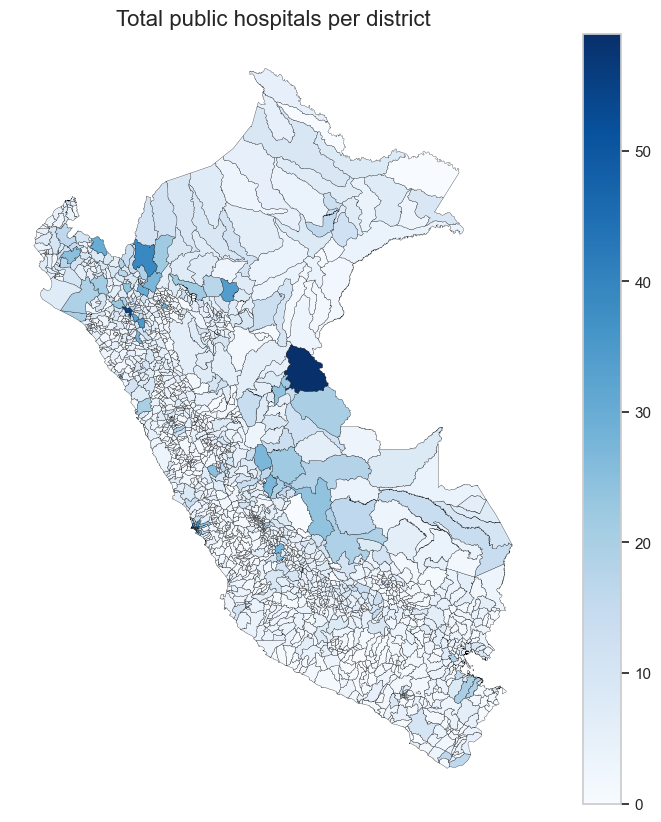

In [ ]:
#Total public hospitals per district
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

distritos.plot(
    column="hospital_count",
    cmap="Blues",
    legend=True,
    linewidth=0.2,
    edgecolor="black",
    ax=ax)

ax.set_title("Total public hospitals per district", fontsize=16)
ax.axis("off")
filename = 'Map 1-Total public hospitals per district.jpg'
output_path = os.path.join(output_folder, filename)
fig.savefig(output_path, dpi=300)

plt.show()

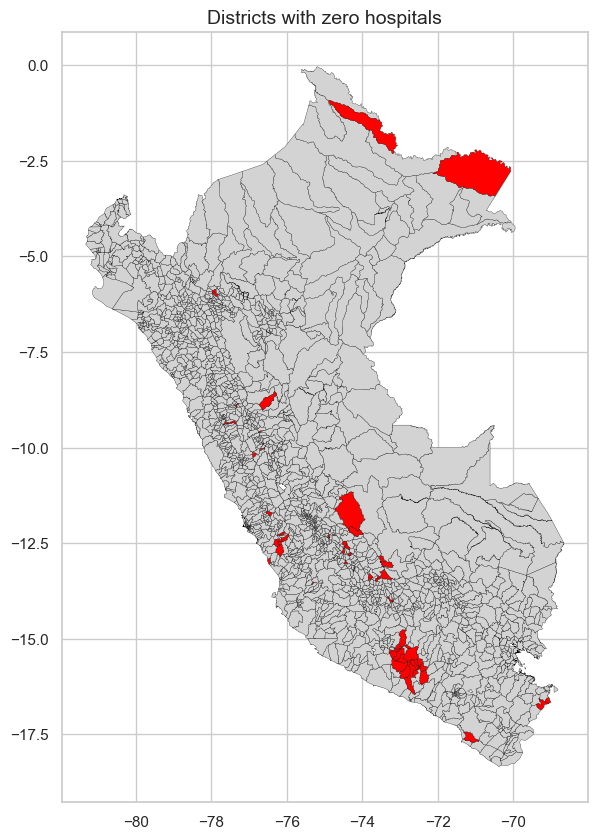

In [ ]:
# Districts with zero hospitals
distritos["zero_hosp"] = distritos["hospital_count"] == 0

cmap = mcolors.ListedColormap(['lightgrey', 'red'])
fig, ax = plt.subplots(figsize=(12, 10))
distritos.plot(
    column="zero_hosp",
    cmap=cmap,
    legend=False,  # Optional: legend can be added manually
    linewidth=0.2,
    edgecolor="black",
    ax=ax)
ax.set_title("Districts with Zero Hospitals", fontsize=16)
plt.title("Districts with zero hospitals", fontsize=14)
filename = 'Map 2-Highlight districts with zero hospitals.jpg'
output_path = os.path.join(output_folder, filename)
fig.savefig(output_path, dpi=300)
plt.show()

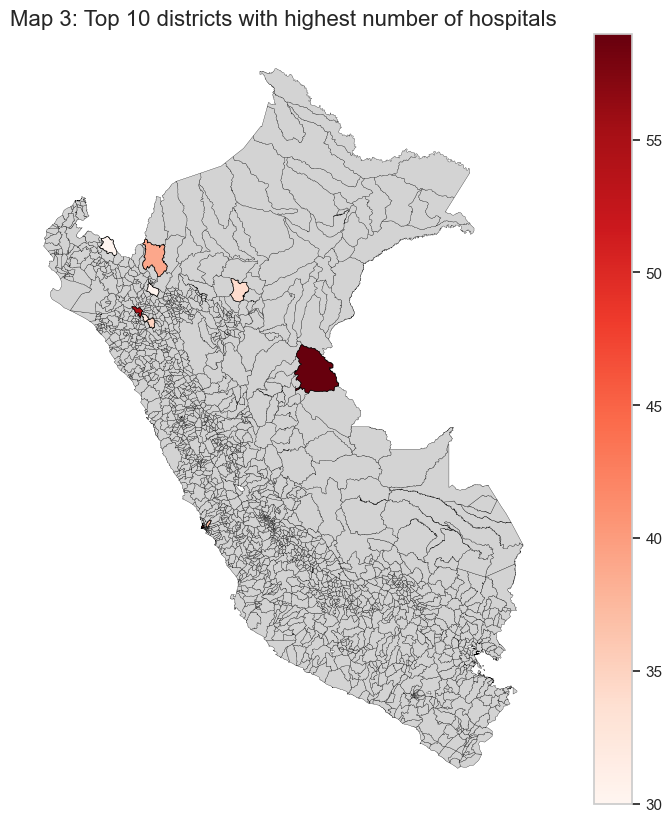

In [ ]:
# Top 10 districts with the highest number of hospitals (distinct color scale).

top10_districts = distritos.nlargest(10, 'hospital_count')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

distritos.plot(color='lightgray', linewidth=0.2, edgecolor='black', ax=ax)

top10_districts.plot(column='hospital_count', cmap='Reds', linewidth=0.5, edgecolor='black', legend=True, ax=ax)

ax.set_title("Map 3: Top 10 districts with highest number of hospitals", fontsize=16)
ax.axis("off")

filename = "Map 3-Top 10 districts with highest number of hospitals.jpg"
output_path = os.path.join(output_folder, filename)
fig.savefig(output_path, dpi=300)

plt.show()

Task 2: Department-level Analysis

In [ ]:
distritos['DEPARTAMEN'].unique() #We check the departments.

array(['HUANUCO', 'UCAYALI', 'LORETO', 'LA LIBERTAD', 'CAJAMARCA',
       'TACNA', 'MOQUEGUA', 'AREQUIPA', 'PUNO', 'APURIMAC', 'ANCASH',
       'CUSCO', 'ICA', 'SAN MARTIN', 'LAMBAYEQUE', 'HUANCAVELICA',
       'PASCO', 'AMAZONAS', 'LIMA', 'JUNIN', 'MADRE DE DIOS', 'AYACUCHO',
       'CALLAO', 'TUMBES', 'PIURA'], dtype=object)

Hospitales por departamento

In [ ]:
hospitals_by_dept = distritos.groupby('DEPARTAMEN')['hospital_count'].sum().reset_index() #We calculate the hospital count per "DEPARTMEN".


In [ ]:
hospitals_by_dept_sorted = hospitals_by_dept.sort_values(by='hospital_count', ascending=False)
print("Summary table (Highest to Lowest):\n", hospitals_by_dept_sorted)

Summary table (Highest to Lowest):
        DEPARTAMEN  hospital_count
5       CAJAMARCA             845
14           LIMA             774
11          JUNIN             445
19          PIURA             442
0        AMAZONAS             417
1          ANCASH             416
20           PUNO             407
4        AYACUCHO             387
21     SAN MARTIN             379
2        APURIMAC             375
15         LORETO             351
7           CUSCO             339
12    LA LIBERTAD             336
8    HUANCAVELICA             325
9         HUANUCO             261
18          PASCO             258
24        UCAYALI             234
3        AREQUIPA             224
13     LAMBAYEQUE             181
10            ICA             146
6          CALLAO              97
22          TACNA              79
16  MADRE DE DIOS              66
17       MOQUEGUA              56
23         TUMBES              54


The department with the highest number of hospitals is Cajamarca.

The department with the lowest number of hospitals is Tumbes.

Bar chart

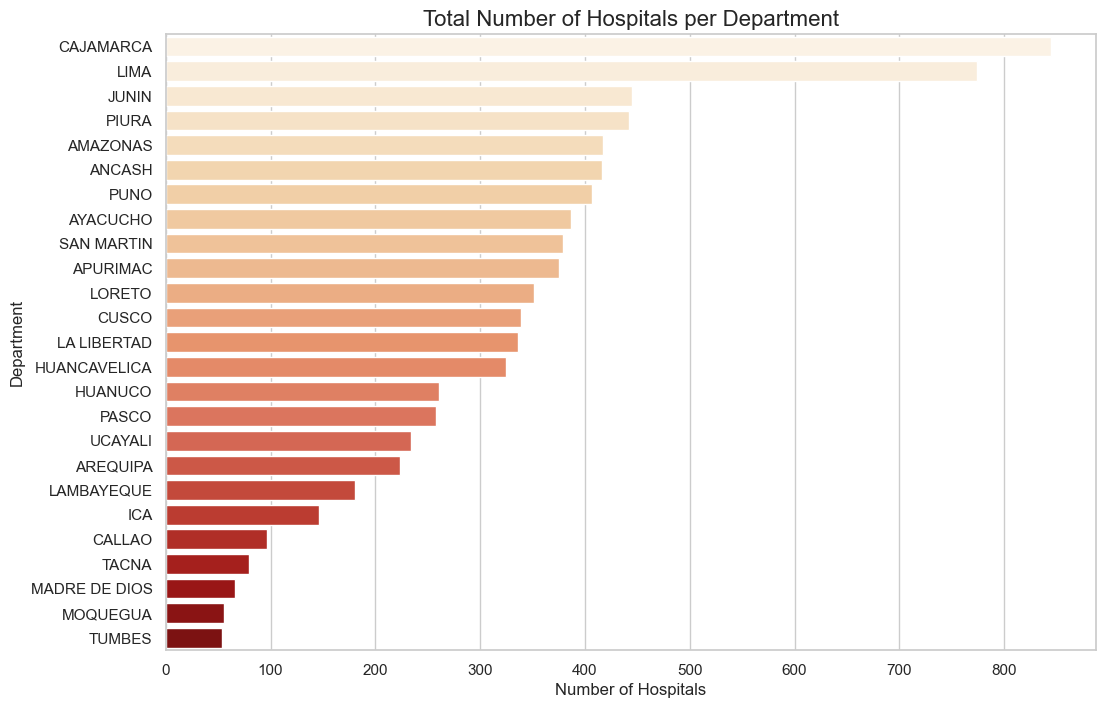

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(
    x='hospital_count',
    y='DEPARTAMEN',
    data=hospitals_by_dept_sorted,
    palette="OrRd",
    dodge=False,
    hue='DEPARTAMEN',  
    legend=False        
)
plt.title('Total Number of Hospitals per Department', fontsize=16)
plt.xlabel('Number of Hospitals')
plt.ylabel('Department')
filename = 'Bar chart'
output_path = os.path.join(output_folder, filename)
fig.savefig(output_path, dpi=300)
plt.show()

Department-level choropleth map

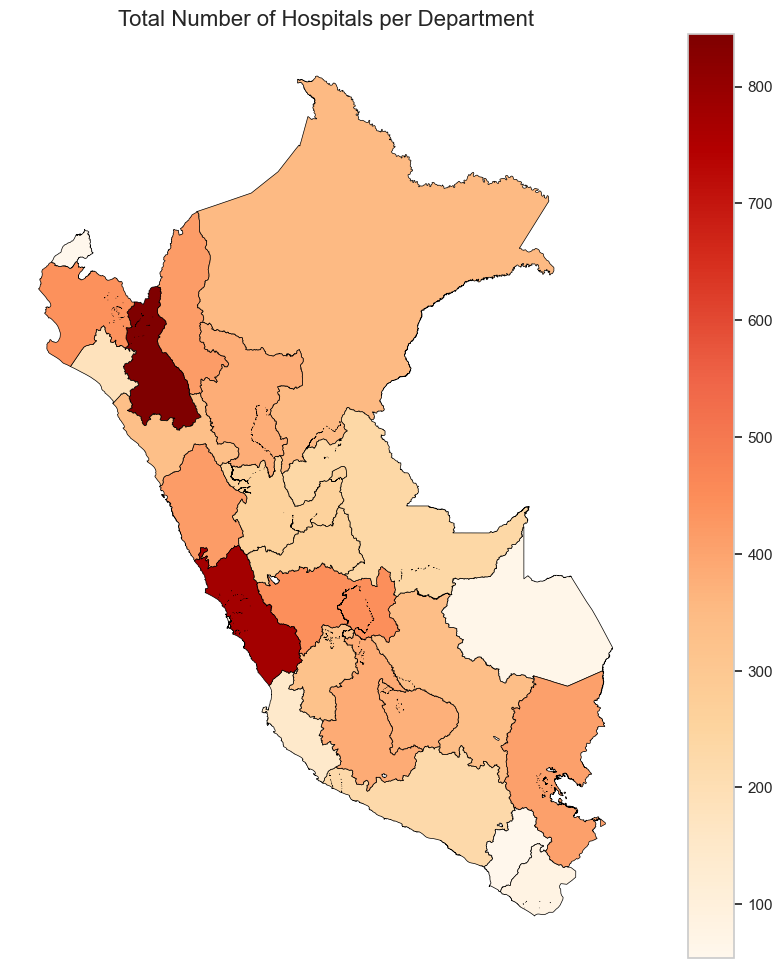

In [ ]:
dept_geo = distritos.dissolve(by='DEPARTAMEN', aggfunc='sum').reset_index()

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
dept_geo.plot(column='hospital_count', 
              cmap='OrRd', 
              legend=True, 
              edgecolor='black', 
              linewidth=0.5,
              ax=ax)
ax.set_title('Total Number of Hospitals per Department', fontsize=16)
ax.axis('off')

filename = 'Department level choropleth map'
output_path = os.path.join(output_folder, filename)
fig.savefig(output_path, dpi=300)

plt.show()

# Proximidad y Folium

In [ ]:
!pip install --upgrade fiona geopandas

import pandas as pd
import geopandas as gpd
import fiona

# Verificar versi√≥n de fiona
print(f"Versi√≥n de fiona: {fiona.__version__}")
print(f"Versi√≥n de geopandas: {gpd.__version__}")

# Intenta con engine pyogrio si est√° disponible
try:
    gdf_distritos = gpd.read_file("data/shape_file/DISTRITOS.shp", engine='pyogrio')
    print("Cargado con pyogrio")
except:
    print("pyogrio no disponible, inst√°lalo con: !pip install pyogrio")

Versi√≥n de fiona: 1.10.1
Versi√≥n de geopandas: 0.13.2
Cargado con pyogrio


In [10]:
import os
from pathlib import Path

# Forzar el directorio correcto
os.chdir('c:/Users/Bruno/Documents/GitHub/Hospitals-Access-Peru')
print("Directorio actual:", os.getcwd())

# Verificar archivos
print("\nArchivos encontrados:")
print(f"‚úì outputs/gdf_hospitales_clean.parquet: {Path('outputs/gdf_hospitales_clean.parquet').exists()}")
print(f"‚úì outputs/distritos_enriched.parquet: {Path('outputs/distritos_enriched.parquet').exists()}")
print(f"‚úì data/shape_file/CCPP_JGN100K.shp: {Path('data/shape_file/CCPP_JGN100K.shp').exists()}")

Directorio actual: c:\Users\Bruno\Documents\GitHub\Hospitals-Access-Peru

Archivos encontrados:
‚úì outputs/gdf_hospitales_clean.parquet: True
‚úì outputs/distritos_enriched.parquet: True
‚úì data/shape_file/CCPP_JGN100K.shp: False


In [11]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

In [ ]:
# ============================================================================
# 0. CONFIGURACI√ìN Y RUTAS
# ============================================================================

# Rutas de datos (relativas al directorio ra√≠z del proyecto)
BASE_DIR = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
DATA_DIR = BASE_DIR / "data"
OUTPUTS_DIR = BASE_DIR / "outputs"
OUTPUT_FOLIUM_DIR = BASE_DIR / "output" / "folium"
OUTPUT_FOLIUM_DIR.mkdir(parents=True, exist_ok=True)

# Archivos de entrada
DISTRITOS_ENRICHED = OUTPUTS_DIR / "distritos_enriched.parquet"
DEPTOS_ENRICHED = OUTPUTS_DIR / "deptos_enriched.parquet"
HOSPITALES_CLEAN = OUTPUTS_DIR / "gdf_hospitales_clean.parquet"
CENTROS_POBLADOS = DATA_DIR / "Censo" / "CCPP_IGN100K.shp"

# CRS
CRS_WGS84 = "EPSG:4326"  # Para visualizaci√≥n
CRS_UTM = "EPSG:32718"   # Para c√°lculos m√©tricos (zona 18S Per√∫)

print("="*80)
print("AN√ÅLISIS DE PROXIMIDAD Y MAPAS DIN√ÅMICOS CON FOLIUM")
print("="*80)

Verificando archivos:
  Hospitales: True
  Distritos: True
  Centros Poblados: False


In [32]:
import pandas as pd
import geopandas as gpd

print("\n[1/6] Cargando datos...")

# Cargar hospitales desde parquet
df_hospitales = pd.read_parquet(HOSPITALES_CLEAN)
gdf_hospitales = gpd.GeoDataFrame(
    df_hospitales,
    geometry=gpd.points_from_xy(df_hospitales['ESTE'], df_hospitales['NORTE']),
    crs=CRS_WGS84
)
print(f"   ‚úì Hospitales operacionales: {len(gdf_hospitales):,}")

# Cargar distritos con pyogrio
gdf_distritos = gpd.read_file("data/shape_file/DISTRITOS.shp", engine='pyogrio')
gdf_distritos = gdf_distritos.to_crs(CRS_WGS84)

# Contar hospitales por distrito
gdf_distritos_hospitales = gpd.sjoin(
    gdf_distritos, 
    gdf_hospitales[['geometry']], 
    how='left', 
    predicate='contains'
)
gdf_distritos['num_hospitales'] = gdf_distritos_hospitales.groupby(gdf_distritos_hospitales.index).size()
gdf_distritos['num_hospitales'] = gdf_distritos['num_hospitales'].fillna(0).astype(int)

print(f"   ‚úì Distritos: {len(gdf_distritos):,}")

# Cargar centros poblados
gdf_ccpp = gpd.read_file("data/Censo/CCPP_IGN100K.shp", engine='pyogrio')
gdf_ccpp = gdf_ccpp.to_crs(CRS_WGS84)
print(f"   ‚úì Centros poblados: {len(gdf_ccpp):,}")

# Filtrar solo Lima y Loreto (columna se llama DEP, no DEPARTAMEN)
gdf_ccpp_lima = gdf_ccpp[gdf_ccpp['DEP'] == 'LIMA'].copy()
gdf_ccpp_loreto = gdf_ccpp[gdf_ccpp['DEP'] == 'LORETO'].copy()

print(f"   ‚úì Centros poblados Lima: {len(gdf_ccpp_lima):,}")
print(f"   ‚úì Centros poblados Loreto: {len(gdf_ccpp_loreto):,}")


[1/6] Cargando datos...
   ‚úì Hospitales operacionales: 7,954
   ‚úì Distritos: 1,873
   ‚úì Centros poblados: 136,587
   ‚úì Centros poblados Lima: 7,615
   ‚úì Centros poblados Loreto: 3,447


In [52]:
# ============================================================================
# 2. AN√ÅLISIS DE PROXIMIDAD (BUFFER 10 KM) - VERSI√ìN CORREGIDA Y ROBUSTA
# ============================================================================

print("\n[2/6] Analizando proximidad a hospitales (buffer 10 km)...")

# --- Asumo que ya tienes definidas estas constantes/CRS ---
# CRS_WGS84 = "EPSG:4326"
# CRS_UTM   = "EPSG:32718"  # Ejemplo; usa el que hayas definido

# Caja simple de Per√∫ para validaciones r√°pidas
peru_bounds = {'min_lon': -81.5, 'max_lon': -68.5, 'min_lat': -18.5, 'max_lat': 0.5}

def _en_peru_count(geo):
    """Cu√°ntos puntos caen dentro de la caja de Per√∫."""
    x = geo.x
    y = geo.y
    m = (x >= peru_bounds['min_lon']) & (x <= peru_bounds['max_lon']) & \
        (y >= peru_bounds['min_lat']) & (y <= peru_bounds['max_lat'])
    return int(m.sum())

# ============================================================================
# CORRECCI√ìN *CONDICIONAL* DE COORDENADAS EN HOSPITALES
# ============================================================================

print("\nüîÑ VERIFICANDO COORDENADAS DE HOSPITALES")

gdf_hospitales_corregido = gdf_hospitales.copy()

# Asegura CRS conocido
if gdf_hospitales_corregido.crs is None:
    gdf_hospitales_corregido = gdf_hospitales_corregido.set_crs(CRS_WGS84, allow_override=True)
elif str(gdf_hospitales_corregido.crs).lower() != str(CRS_WGS84).lower():
    gdf_hospitales_corregido = gdf_hospitales_corregido.to_crs(CRS_WGS84)

# Conteo dentro de Per√∫ ANTES de cualquier swap
c0 = _en_peru_count(gdf_hospitales_corregido.geometry)

# Geometr√≠as con X<->Y (por si vinieron invertidas)
geometrias_swapped = gpd.points_from_xy(
    gdf_hospitales_corregido.geometry.y,
    gdf_hospitales_corregido.geometry.x,
    crs=CRS_WGS84
)
c1 = _en_peru_count(geometrias_swapped)

# Elegir la versi√≥n que m√°s cae dentro de Per√∫ (si empatan, NO swap)
if c1 > c0:
    print("   ‚Ä¢ Detectado mejor encaje en Per√∫ tras intercambiar coordenadas ‚Üí aplicando swap.")
    gdf_hospitales_corregido = gdf_hospitales_corregido.set_geometry(geometrias_swapped)
else:
    print("   ‚Ä¢ Coordenadas ya estaban correctas ‚Üí no se intercambian.")

print(f"   ‚Ä¢ LONGITUD (X): {gdf_hospitales_corregido.geometry.x.min():.2f} a {gdf_hospitales_corregido.geometry.x.max():.2f}")
print(f"   ‚Ä¢ LATITUD  (Y): {gdf_hospitales_corregido.geometry.y.min():.2f} a {gdf_hospitales_corregido.geometry.y.max():.2f}")
print(f"   ‚Ä¢ Hospitales dentro de Per√∫: {_en_peru_count(gdf_hospitales_corregido.geometry)}/{len(gdf_hospitales_corregido)}")

# Actualizar variable global
gdf_hospitales = gdf_hospitales_corregido

# ============================================================================
# FUNCI√ìN DE AN√ÅLISIS DE PROXIMIDAD (CONTEO CORRECTO)
# ============================================================================

def analizar_proximidad_corregido_final(gdf_ccpp_region, gdf_hospitales_corr, nombre_region, radio_km=10):
    """
    Analiza cu√°ntos hospitales hay a radio_km de cada centro poblado.
    Arreglos:
      - Join 'inner' o filtrado de NaN para contar s√≥lo matches reales.
      - Detecci√≥n robusta de columna de departamento para hospitales.
    """
    print(f"\n[Analizando {nombre_region} - RADIO {radio_km}km...]")

    # Columna departamento en hospitales
    col_dep_hosp = None
    for cand in ['Departamento', 'DEPARTAMENTO', 'DEP', 'Dep', 'departamento']:
        if cand in gdf_hospitales_corr.columns:
            col_dep_hosp = cand
            break
    if col_dep_hosp is None:
        raise ValueError("No se encontr√≥ columna de departamento en gdf_hospitales.")

    # Filtrar hospitales de la regi√≥n
    gdf_hosp_region = gdf_hospitales_corr[
        gdf_hospitales_corr[col_dep_hosp].astype(str).str.upper() == nombre_region.upper()
    ].copy()

    print(f"   ‚Ä¢ Hospitales en {nombre_region}: {len(gdf_hosp_region)}")

    if len(gdf_ccpp_region) == 0 or len(gdf_hosp_region) == 0:
        print("   ‚ö†Ô∏è No hay datos para analizar")
        return None, None, None, gdf_hosp_region

    # Proyecci√≥n m√©trica
    gdf_ccpp_utm = gdf_ccpp_region.to_crs(CRS_UTM)
    gdf_hosp_utm = gdf_hosp_region.to_crs(CRS_UTM)

    print(f"   ‚Ä¢ Verificaci√≥n de ubicaciones:")
    print(f"     - Centros poblados: {len(gdf_ccpp_utm)}")
    print(f"     - Hospitales: {len(gdf_hosp_utm)}")

    # Buffers
    gdf_ccpp_buffered = gdf_ccpp_utm.copy()
    gdf_ccpp_buffered['buffer'] = gdf_ccpp_buffered.geometry.buffer(radio_km * 1000)

    # GeoDataFrame temporal con la columna 'buffer' como geometr√≠a
    cols_meta = [c for c in ['NOM_POBLAD', 'DEP', 'PROV', 'DIST'] if c in gdf_ccpp_buffered.columns]
    gdf_buffers = gdf_ccpp_buffered[cols_meta + ['buffer']].copy()
    gdf_buffers = gpd.GeoDataFrame(gdf_buffers, geometry='buffer', crs=CRS_UTM)

    # Spatial join: usa 'inner' para quedarte s√≥lo con matches reales
    gdf_joined = gpd.sjoin(
        gdf_buffers,
        gdf_hosp_utm[['geometry']],
        how='inner',               # <-- clave: s√≥lo intersecciones reales
        predicate='intersects'
    )

    # Contar hospitales por centro poblado (√≠ndice del left se preserva)
    conteo_hospitales = gdf_joined.groupby(level=0).size()

    # Mapear conteos a CCPP (los que no aparezcan ‚Üí 0)
    gdf_ccpp_utm = gdf_ccpp_utm.copy()
    gdf_ccpp_utm['num_hospitales'] = gdf_ccpp_utm.index.map(conteo_hospitales).fillna(0).astype(int)

    # Resultados en WGS84
    keep_cols = [c for c in ['NOM_POBLAD', 'DEP', 'PROV', 'DIST', 'num_hospitales', 'geometry'] if c in gdf_ccpp_utm.columns]
    gdf_resultados = gpd.GeoDataFrame(
        gdf_ccpp_utm[keep_cols].copy(),
        geometry='geometry',
        crs=CRS_UTM
    ).to_crs(CRS_WGS84)

    # Extremos
    if gdf_resultados['num_hospitales'].nunique() > 1:
        idx_min = gdf_resultados['num_hospitales'].idxmin()
        idx_max = gdf_resultados['num_hospitales'].idxmax()
        ccpp_menos = gdf_resultados.loc[idx_min]
        ccpp_mas   = gdf_resultados.loc[idx_max]
    else:
        ccpp_menos = gdf_resultados.iloc[0]
        ccpp_mas   = gdf_resultados.iloc[0]
        print(f"   ‚ö†Ô∏è Todos los centros tienen {ccpp_menos['num_hospitales']} hospitales")

    print(f"   ‚úì Centro poblado con MENOS hospitales:")
    print(f"     ‚Ä¢ {ccpp_menos['NOM_POBLAD']}: {ccpp_menos['num_hospitales']} hospitales")
    print(f"   ‚úì Centro poblado con M√ÅS hospitales:")
    print(f"     ‚Ä¢ {ccpp_mas['NOM_POBLAD']}: {ccpp_mas['num_hospitales']} hospitales")

    # Stats
    stats = gdf_resultados['num_hospitales'].describe()
    print(f"   üìä Estad√≠sticas detalladas:")
    print(f"     ‚Ä¢ M√≠nimo: {stats['min']}")
    print(f"     ‚Ä¢ M√°ximo: {stats['max']}")
    print(f"     ‚Ä¢ Promedio: {stats['mean']:.2f}")
    print(f"     ‚Ä¢ Centros con 0 hospitales: {(gdf_resultados['num_hospitales'] == 0).sum()}")
    print(f"     ‚Ä¢ Centros con 1+ hospitales: {(gdf_resultados['num_hospitales'] > 0).sum()}")

    # Ejemplos
    print(f"   üéØ Ejemplos:")
    for count in sorted(gdf_resultados['num_hospitales'].unique())[:3]:
        ejemplos = gdf_resultados[gdf_resultados['num_hospitales'] == count].head(2)
        for _, ej in ejemplos.iterrows():
            print(f"     ‚Ä¢ {ej['NOM_POBLAD']}: {ej['num_hospitales']} hospitales")

    return gdf_resultados, ccpp_menos, ccpp_mas, gdf_hosp_region

# ============================================================================
# EJECUCI√ìN
# ============================================================================

print("\nüîß EJECUTANDO AN√ÅLISIS CON DATOS CORREGIDOS...")

# Radio base 10 km
resultados_lima,   lima_min,   lima_max,   hospitales_lima   = analizar_proximidad_corregido_final(
    gdf_ccpp_lima, gdf_hospitales, "Lima",   radio_km=10
)
resultados_loreto, loreto_min, loreto_max, hospitales_loreto = analizar_proximidad_corregido_final(
    gdf_ccpp_loreto, gdf_hospitales, "Loreto", radio_km=10
)

# Si no hay variaci√≥n, intenta 5 km
if resultados_lima is not None and resultados_lima['num_hospitales'].nunique() == 1:
    print("\nüîÑ Probando con radio m√°s peque√±o (5km) para Lima...")
    resultados_lima, lima_min, lima_max, hospitales_lima = analizar_proximidad_corregido_final(
        gdf_ccpp_lima, gdf_hospitales, "Lima", radio_km=5
    )

if resultados_loreto is not None and resultados_loreto['num_hospitales'].nunique() == 1:
    print("\nüîÑ Probando con radio m√°s peque√±o (5km) para Loreto...")
    resultados_loreto, loreto_min, loreto_max, hospitales_loreto = analizar_proximidad_corregido_final(
        gdf_ccpp_loreto, gdf_hospitales, "Loreto", radio_km=5
    )

# Si todo sale 0, intenta 20 km
if resultados_lima is not None and resultados_lima['num_hospitales'].max() == 0:
    print("\nüîÑ Probando con radio m√°s grande (20km) para Lima...")
    resultados_lima, lima_min, lima_max, hospitales_lima = analizar_proximidad_corregido_final(
        gdf_ccpp_lima, gdf_hospitales, "Lima", radio_km=20
    )

if resultados_loreto is not None and resultados_loreto['num_hospitales'].max() == 0:
    print("\nüîÑ Probando con radio m√°s grande (20km) para Loreto...")
    resultados_loreto, loreto_min, loreto_max, hospitales_loreto = analizar_proximidad_corregido_final(
        gdf_ccpp_loreto, gdf_hospitales, "Loreto", radio_km=20
    )

print("\n‚úÖ AN√ÅLISIS DE PROXIMIDAD COMPLETADO")



[2/6] Analizando proximidad a hospitales (buffer 10 km)...

üîÑ VERIFICANDO COORDENADAS DE HOSPITALES
   ‚Ä¢ Detectado mejor encaje en Per√∫ tras intercambiar coordenadas ‚Üí aplicando swap.
   ‚Ä¢ LONGITUD (X): -81.31 a 0.00
   ‚Ä¢ LATITUD  (Y): -18.34 a 0.00
   ‚Ä¢ Hospitales dentro de Per√∫: 7951/7954

üîß EJECUTANDO AN√ÅLISIS CON DATOS CORREGIDOS...

[Analizando Lima - RADIO 10km...]
   ‚Ä¢ Hospitales en Lima: 776
   ‚Ä¢ Verificaci√≥n de ubicaciones:
     - Centros poblados: 7615
     - Hospitales: 776
   ‚úì Centro poblado con MENOS hospitales:
     ‚Ä¢ RIEGOPAMPA: 0 hospitales
   ‚úì Centro poblado con M√ÅS hospitales:
     ‚Ä¢ SAN BORJA: 223 hospitales
   üìä Estad√≠sticas detalladas:
     ‚Ä¢ M√≠nimo: 0.0
     ‚Ä¢ M√°ximo: 223.0
     ‚Ä¢ Promedio: 6.80
     ‚Ä¢ Centros con 0 hospitales: 953
     ‚Ä¢ Centros con 1+ hospitales: 6662
   üéØ Ejemplos:
     ‚Ä¢ RIEGOPAMPA: 0 hospitales
     ‚Ä¢ YANAPAMPA: 0 hospitales
     ‚Ä¢ ISCOPAMPA: 1 hospitales
     ‚Ä¢ COLPA: 1 hospitale

In [53]:
# ============================================================================
# 3. GUARDAR CSV CON RESULTADOS
# ============================================================================

print("\n[3/6] Guardando CSV con resultados...")

# Preparar CSV de resultados
resultados_csv = pd.DataFrame([
    {
        'Region': 'Lima',
        'Tipo': 'MENOS hospitales',
        'Centro_Poblado': lima_min['NOM_POBLAD'],  # Cambiado de 'NOMBCCPP' a 'NOM_POBLAD'
        'Num_Hospitales': lima_min['num_hospitales'],
        'Latitud': lima_min.geometry.y,
        'Longitud': lima_min.geometry.x
    },
    {
        'Region': 'Lima',
        'Tipo': 'M√ÅS hospitales',
        'Centro_Poblado': lima_max['NOM_POBLAD'],  # Cambiado de 'NOMBCCPP' a 'NOM_POBLAD'
        'Num_Hospitales': lima_max['num_hospitales'],
        'Latitud': lima_max.geometry.y,
        'Longitud': lima_max.geometry.x
    },
    {
        'Region': 'Loreto',
        'Tipo': 'MENOS hospitales',
        'Centro_Poblado': loreto_min['NOM_POBLAD'],  # Cambiado de 'NOMBCCPP' a 'NOM_POBLAD'
        'Num_Hospitales': loreto_min['num_hospitales'],
        'Latitud': loreto_min.geometry.y,
        'Longitud': loreto_min.geometry.x
    },
    {
        'Region': 'Loreto',
        'Tipo': 'M√ÅS hospitales',
        'Centro_Poblado': loreto_max['NOM_POBLAD'],  # Corregido 'Centro_Ado' a 'Centro_Poblado'
        'Num_Hospitales': loreto_max['num_hospitales'],
        'Latitud': loreto_max.geometry.y,
        'Longitud': loreto_max.geometry.x
    }
])

resultados_csv.to_csv(OUTPUT_FOLIUM_DIR / "resultados_proximidad.csv", index=False)
print(f"   ‚úì CSV guardado: {OUTPUT_FOLIUM_DIR / 'resultados_proximidad.csv'}")


[3/6] Guardando CSV con resultados...
   ‚úì CSV guardado: output\folium\resultados_proximidad.csv


In [54]:
# ============================================================================
# 4. MAPA FOLIUM NACIONAL: COROPLETA + MARKERCLUSTER
# ============================================================================

print("\n[4/6] Generando mapa nacional (coropleta + MarkerCluster)...")

# Centro de Per√∫ (coordenadas actualizadas)
centro_peru = [-9.19, -75.0152]

# Crear mapa base
mapa_nacional = folium.Map(
    location=centro_peru,
    zoom_start=6,
    tiles='OpenStreetMap'
)

# VERIFICAR COLUMNAS ANTES DE PROCEDER
print("Columnas en gdf_distritos:", list(gdf_distritos.columns))
print("Columnas en gdf_hospitales:", list(gdf_hospitales.columns))

# A√±adir coropleta de hospitales por distrito
folium.Choropleth(
    geo_data=gdf_distritos.__geo_interface__,
    data=gdf_distritos,
    columns=['IDDIST', 'num_hospitales'],  # Verificar que estas columnas existen
    key_on='feature.properties.IDDIST',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='N√∫mero de Hospitales por Distrito',
    nan_fill_color='lightgray',
    bins=8,  # A√±adir bins para mejor visualizaci√≥n
    line_weight=0.5
).add_to(mapa_nacional)

# A√±adir MarkerCluster de hospitales
marker_cluster = MarkerCluster(
    name="Hospitales",
    options={
        'maxClusterRadius': 50,
        'disableClusteringAtZoom': 12
    }
).add_to(mapa_nacional)

# A√±adir marcadores individuales para hospitales
for idx, row in gdf_hospitales.iterrows():
    # Verificar que las columnas del popup existen
    nombre = row.get('NOMBRE DEL ESTABLECIMIENTO', 'Nombre no disponible')
    clasificacion = row.get('CLASIFICACION', 'Clasificaci√≥n no disponible')
    distrito = row.get('DISTRITO', 'Distrito no disponible')
    
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(
            f"<b>{nombre}</b><br>"
            f"Clasificaci√≥n: {clasificacion}<br>"
            f"Distrito: {distrito}<br>"
            f"Departamento: {row.get('Departamento', 'N/A')}",
            max_width=300
        ),
        tooltip=nombre,
        icon=folium.Icon(color='red', icon='plus-sign', prefix='fa')
    ).add_to(marker_cluster)

# A√±adir control de capas
folium.LayerControl().add_to(mapa_nacional)

# A√±adir t√≠tulo al mapa
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Mapa Nacional: Hospitales y Distribuci√≥n por Distrito</b></h3>
             <p align="center">Coropleta muestra n√∫mero de hospitales por distrito<br>Marcadores rojos muestran ubicaci√≥n de hospitales</p>
             '''
mapa_nacional.get_root().html.add_child(folium.Element(title_html))

# Guardar
mapa_nacional.save(OUTPUT_FOLIUM_DIR / "mapa_nacional.html")
print(f"   ‚úì Mapa guardado: {OUTPUT_FOLIUM_DIR / 'mapa_nacional.html'}")


[4/6] Generando mapa nacional (coropleta + MarkerCluster)...
Columnas en gdf_distritos: ['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO', 'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry', 'num_hospitales']
Columnas en gdf_hospitales: ['Instituci√≥n', 'C√≥digo √önico', 'Nombre del establecimiento', 'Clasificaci√≥n', 'Tipo', 'Departamento', 'Provincia', 'Distrito', 'UBIGEO', 'Direcci√≥n', 'C√≥digo DISA', 'C√≥digo Red', 'C√≥digo Microrred', 'DISA', 'Red', 'Microrred', 'C√≥digo UE', 'Unidad Ejecutora', 'Categoria', 'Tel√©fono', 'Tipo Doc.Categorizaci√≥n', 'Nro.Doc.Categorizaci√≥n', 'Horario', 'Inicio de Actividad', 'Director M√©dico y/o Responsable de la Atenci√≥n de Salud', 'Estado', 'Situaci√≥n', 'Condici√≥n', 'Inspecci√≥n', 'NORTE', 'ESTE', 'COTA', 'CAMAS', 'geometry']
   ‚úì Mapa guardado: output\folium\mapa_nacional.html


In [55]:
# ============================================================================
# 5. MAPA FOLIUM LIMA: PROXIMIDAD (ROJO/VERDE)
# ============================================================================

print("\n[5/6] Generando mapa de proximidad - Lima...")

# Centro en Lima
centro_lima = [-12.0464, -77.0428]

mapa_lima = folium.Map(
    location=centro_lima,
    zoom_start=9,
    tiles='OpenStreetMap'
)

# VERIFICAR DATOS ANTES DE CREAR EL MAPA
print(f"   Lima - Centro con MENOS hospitales: {lima_min['NOM_POBLAD']} ({lima_min['num_hospitales']} hospitales)")
print(f"   Lima - Centro con M√ÅS hospitales: {lima_max['NOM_POBLAD']} ({lima_max['num_hospitales']} hospitales)")

# C√çRCULO ROJO: Centro poblado con MENOS hospitales
folium.Circle(
    location=[lima_min.geometry.y, lima_min.geometry.x],
    radius=10000,  # 10 km
    color='red',
    fill=True,
    fillColor='red',
    fillOpacity=0.2,
    popup=f"<b>üî¥ MENOS hospitales cercanos</b><br>"
          f"Centro poblado: {lima_min['NOM_POBLAD']}<br>"  # Cambiado a NOM_POBLAD
          f"Hospitales en 10km: {lima_min['num_hospitales']}",
    tooltip=f"üî¥ {lima_min['NOM_POBLAD']} ({lima_min['num_hospitales']} hospitales)"  # Cambiado a NOM_POBLAD
).add_to(mapa_lima)

# Marcador del centro poblado (rojo)
folium.Marker(
    location=[lima_min.geometry.y, lima_min.geometry.x],
    popup=f"<b>{lima_min['NOM_POBLAD']}</b><br>"  # Cambiado a NOM_POBLAD
          f"Hospitales cercanos: {lima_min['num_hospitales']}",
    icon=folium.Icon(color='red', icon='home')
).add_to(mapa_lima)

# C√çRCULO VERDE: Centro poblado con M√ÅS hospitales
folium.Circle(
    location=[lima_max.geometry.y, lima_max.geometry.x],
    radius=10000,  # 10 km
    color='green',
    fill=True,
    fillColor='green',
    fillOpacity=0.2,
    popup=f"<b>üü¢ M√ÅS hospitales cercanos</b><br>"
          f"Centro poblado: {lima_max['NOM_POBLAD']}<br>"  # Cambiado a NOM_POBLAD
          f"Hospitales en 10km: {lima_max['num_hospitales']}",
    tooltip=f"üü¢ {lima_max['NOM_POBLAD']} ({lima_max['num_hospitales']} hospitales)"  # Cambiado a NOM_POBLAD
).add_to(mapa_lima)

# Marcador del centro poblado (verde)
folium.Marker(
    location=[lima_max.geometry.y, lima_max.geometry.x],
    popup=f"<b>{lima_max['NOM_POBLAD']}</b><br>"  # Cambiado a NOM_POBLAD
          f"Hospitales cercanos: {lima_max['num_hospitales']}",
    icon=folium.Icon(color='green', icon='home')
).add_to(mapa_lima)

# A√±adir hospitales de Lima con verificaci√≥n de columnas
for idx, row in hospitales_lima.iterrows():
    nombre_hospital = row.get('NOMBRE DEL ESTABLECIMIENTO', 'Hospital')
    distrito = row.get('DISTRITO', 'Distrito no disponible')
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=6,
        color='blue',
        fill=True,
        fillColor='blue',
        fillOpacity=0.7,
        weight=1,
        popup=folium.Popup(
            f"<b>{nombre_hospital}</b><br>"
            f"Distrito: {distrito}<br>"
            f"Clasificaci√≥n: {row.get('CLASIFICACION', 'N/A')}",
            max_width=300
        ),
        tooltip=nombre_hospital
    ).add_to(mapa_lima)

# A√±adir t√≠tulo y leyenda
title_lima = '''
             <h3 align="center" style="font-size:18px"><b>Lima: Acceso a Hospitales (Radio 10km)</b></h3>
             <p align="center">üî¥ Menor acceso | üü¢ Mayor acceso | üîµ Hospitales</p>
             '''
mapa_lima.get_root().html.add_child(folium.Element(title_lima))

# Guardar
mapa_lima.save(OUTPUT_FOLIUM_DIR / "mapa_proximidad_lima.html")
print(f"   ‚úì Mapa guardado: {OUTPUT_FOLIUM_DIR / 'mapa_proximidad_lima.html'}")

# ============================================================================
# 6. MAPA FOLIUM LORETO: PROXIMIDAD (ROJO/VERDE)
# ============================================================================

print("\n[6/6] Generando mapa de proximidad - Loreto...")

# Centro en Loreto (ajustado para mejor visualizaci√≥n)
centro_loreto = [-4.0, -73.5]

mapa_loreto = folium.Map(
    location=centro_loreto,
    zoom_start=7,
    tiles='OpenStreetMap'
)

# VERIFICAR DATOS ANTES DE CREAR EL MAPA
print(f"   Loreto - Centro con MENOS hospitales: {loreto_min['NOM_POBLAD']} ({loreto_min['num_hospitales']} hospitales)")
print(f"   Loreto - Centro con M√ÅS hospitales: {loreto_max['NOM_POBLAD']} ({loreto_max['num_hospitales']} hospitales)")

# C√çRCULO ROJO: Centro poblado con MENOS hospitales
folium.Circle(
    location=[loreto_min.geometry.y, loreto_min.geometry.x],
    radius=10000,  # 10 km
    color='red',
    fill=True,
    fillColor='red',
    fillOpacity=0.2,
    popup=f"<b>üî¥ MENOS hospitales cercanos</b><br>"
          f"Centro poblado: {loreto_min['NOM_POBLAD']}<br>"  # Cambiado a NOM_POBLAD
          f"Hospitales en 10km: {loreto_min['num_hospitales']}",
    tooltip=f"üî¥ {loreto_min['NOM_POBLAD']} ({loreto_min['num_hospitales']} hospitales)"  # Cambiado a NOM_POBLAD
).add_to(mapa_loreto)

# Marcador del centro poblado (rojo)
folium.Marker(
    location=[loreto_min.geometry.y, loreto_min.geometry.x],
    popup=f"<b>{loreto_min['NOM_POBLAD']}</b><br>"  # Cambiado a NOM_POBLAD
          f"Hospitales cercanos: {loreto_min['num_hospitales']}",
    icon=folium.Icon(color='red', icon='home')
).add_to(mapa_loreto)

# C√çRCULO VERDE: Centro poblado con M√ÅS hospitales
folium.Circle(
    location=[loreto_max.geometry.y, loreto_max.geometry.x],
    radius=10000,  # 10 km
    color='green',
    fill=True,
    fillColor='green',
    fillOpacity=0.2,
    popup=f"<b>üü¢ M√ÅS hospitales cercanos</b><br>"
          f"Centro poblado: {loreto_max['NOM_POBLAD']}<br>"  # Cambiado a NOM_POBLAD
          f"Hospitales en 10km: {loreto_max['num_hospitales']}",
    tooltip=f"üü¢ {loreto_max['NOM_POBLAD']} ({loreto_max['num_hospitales']} hospitales)"  # Cambiado a NOM_POBLAD
).add_to(mapa_loreto)

# Marcador del centro poblado (verde)
folium.Marker(
    location=[loreto_max.geometry.y, loreto_max.geometry.x],
    popup=f"<b>{loreto_max['NOM_POBLAD']}</b><br>"  # Cambiado a NOM_POBLAD
          f"Hospitales cercanos: {loreto_max['num_hospitales']}",
    icon=folium.Icon(color='green', icon='home')
).add_to(mapa_loreto)

# A√±adir hospitales de Loreto con verificaci√≥n de columnas
for idx, row in hospitales_loreto.iterrows():
    nombre_hospital = row.get('NOMBRE DEL ESTABLECIMIENTO', 'Hospital')
    distrito = row.get('DISTRITO', 'Distrito no disponible')
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=6,
        color='blue',
        fill=True,
        fillColor='blue',
        fillOpacity=0.7,
        weight=1,
        popup=folium.Popup(
            f"<b>{nombre_hospital}</b><br>"
            f"Distrito: {distrito}<br>"
            f"Clasificaci√≥n: {row.get('CLASIFICACION', 'N/A')}",
            max_width=300
        ),
        tooltip=nombre_hospital
    ).add_to(mapa_loreto)

# A√±adir t√≠tulo y leyenda
title_loreto = '''
               <h3 align="center" style="font-size:18px"><b>Loreto: Acceso a Hospitales (Radio 10km)</b></h3>
               <p align="center">üî¥ Menor acceso | üü¢ Mayor acceso | üîµ Hospitales</p>
               '''
mapa_loreto.get_root().html.add_child(folium.Element(title_loreto))

# Guardar
mapa_loreto.save(OUTPUT_FOLIUM_DIR / "mapa_proximidad_loreto.html")
print(f"   ‚úì Mapa guardado: {OUTPUT_FOLIUM_DIR / 'mapa_proximidad_loreto.html'}")

print("\n" + "="*80)
print("PROCESO COMPLETADO EXITOSAMENTE")
print("="*80)
print(f"‚úì CSV de resultados: {OUTPUT_FOLIUM_DIR / 'resultados_proximidad.csv'}")
print(f"‚úì Mapa nacional: {OUTPUT_FOLIUM_DIR / 'mapa_nacional.html'}")
print(f"‚úì Mapa Lima: {OUTPUT_FOLIUM_DIR / 'mapa_proximidad_lima.html'}")
print(f"‚úì Mapa Loreto: {OUTPUT_FOLIUM_DIR / 'mapa_proximidad_loreto.html'}")


[5/6] Generando mapa de proximidad - Lima...
   Lima - Centro con MENOS hospitales: RIEGOPAMPA (0 hospitales)
   Lima - Centro con M√ÅS hospitales: SAN BORJA (223 hospitales)
   ‚úì Mapa guardado: output\folium\mapa_proximidad_lima.html

[6/6] Generando mapa de proximidad - Loreto...
   Loreto - Centro con MENOS hospitales: PUEBLO NUEVO (0 hospitales)
   Loreto - Centro con M√ÅS hospitales: TRES DE OCTUBRE (29 hospitales)
   ‚úì Mapa guardado: output\folium\mapa_proximidad_loreto.html

PROCESO COMPLETADO EXITOSAMENTE
‚úì CSV de resultados: output\folium\resultados_proximidad.csv
‚úì Mapa nacional: output\folium\mapa_nacional.html
‚úì Mapa Lima: output\folium\mapa_proximidad_lima.html
‚úì Mapa Loreto: output\folium\mapa_proximidad_loreto.html


In [56]:
# ============================================================================
# RESUMEN FINAL
# ============================================================================

print("\n" + "="*80)
print("‚úÖ PROCESO COMPLETADO")
print("="*80)
print("\nüìÅ Archivos generados:")
print(f"   ‚Ä¢ {OUTPUT_FOLIUM_DIR / 'mapa_nacional.html'}")
print(f"   ‚Ä¢ {OUTPUT_FOLIUM_DIR / 'mapa_proximidad_lima.html'}")
print(f"   ‚Ä¢ {OUTPUT_FOLIUM_DIR / 'mapa_proximidad_loreto.html'}")
print(f"   ‚Ä¢ {OUTPUT_FOLIUM_DIR / 'resultados_proximidad.csv'}")
print("\nüìä Resultados del an√°lisis:")
print(f"\n   LIMA:")
print(f"   üî¥ Menos hospitales: {lima_min['NOM_POBLAD']} ({lima_min['num_hospitales']} hospitales)")  # Cambiado a NOM_POBLAD
print(f"   üü¢ M√°s hospitales: {lima_max['NOM_POBLAD']} ({lima_max['num_hospitales']} hospitales)")    # Cambiado a NOM_POBLAD
print(f"\n   LORETO:")
print(f"   üî¥ Menos hospitales: {loreto_min['NOM_POBLAD']} ({loreto_min['num_hospitales']} hospitales)")  # Cambiado a NOM_POBLAD
print(f"   üü¢ M√°s hospitales: {loreto_max['NOM_POBLAD']} ({loreto_max['num_hospitales']} hospitales)")    # Cambiado a NOM_POBLAD
print("\n" + "="*80)


‚úÖ PROCESO COMPLETADO

üìÅ Archivos generados:
   ‚Ä¢ output\folium\mapa_nacional.html
   ‚Ä¢ output\folium\mapa_proximidad_lima.html
   ‚Ä¢ output\folium\mapa_proximidad_loreto.html
   ‚Ä¢ output\folium\resultados_proximidad.csv

üìä Resultados del an√°lisis:

   LIMA:
   üî¥ Menos hospitales: RIEGOPAMPA (0 hospitales)
   üü¢ M√°s hospitales: SAN BORJA (223 hospitales)

   LORETO:
   üî¥ Menos hospitales: PUEBLO NUEVO (0 hospitales)
   üü¢ M√°s hospitales: TRES DE OCTUBRE (29 hospitales)

